# **Machine Learning in Bioinformatics**

**Homework 3:**<br/>
!!! If you don't fill these fields, your homework does not count !!!<br/>
first name and last name : ثنا آیرملو<br/>
student number : ۹۶۱۰۱۲۸۴

You can run cells by hitting `Shift` + `Enter` or `ctrl` + `Enter`.<br/>
We highly recommend you to read each line of code carefully and try to 
understand what it exactly does.<br/>
Just alter the parts that is between green comments and specified for you. <br/>
Please do not change other parts.

In [20]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import load_breast_cancer 


### about the Data:<br/>
The purpose of this project is to classify tumors into malignant or benign. The following dataset is constructed based on images of tumors. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.
For more details about the features of this dataset you can visit this link:
https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset<br/>
This dataset contains 30 features and 1 label called target.
The original dataset labels are 0 and 1 and in the following code boxes we change it to -1 and 1.

In [27]:
cancer = load_breast_cancer()  ## change if the data set changed
cancer.target = np.where(cancer.target==0, -1, cancer.target)
df = pd.DataFrame(np.c_[cancer["data"], cancer["target"]], columns = np.append(cancer["feature_names"],["target"]))
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,-1.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,-1.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,-1.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,-1.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,-1.0


In [28]:
X_train ,X_test ,X_val ,y_train ,y_test ,y_val = None ,None ,None ,None ,None ,None
################################################################################
# TODO:                                                                        #
# 1- Normalize tha data.                                                       #
# 2- using train_test_split package, split your data into 3 numpy array        #
# called X_train, X_test, and X_val and also split the corresponding labels as #
# y_train, y_test, and y_val. After spliting, the ratio of your data should be # 
# approximately like this:                                                     #
#  Train : 70%     test : 20%       validation : 10%                           #
################################################################################

for feature_name in df.columns:
    if feature_name != 'target':
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        df[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
y = df['target'].values
df = df.drop(['target'], axis=1)
X = df.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125)

        
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################
print((X_train.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_train.shape[0]/cancer.data.shape[0]) * 100, "%")
print((X_test.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_test.shape[0]/cancer.data.shape[0]) * 100, "%")
print((X_val.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_val.shape[0]/cancer.data.shape[0]) * 100, "%")
df.head()

69.94727592267135 %
69.94727592267135 %
20.035149384885763 %
20.035149384885763 %
10.017574692442881 %
10.017574692442881 %


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


# Ensemble Methods

## Problem 1. Bagging (15 points)


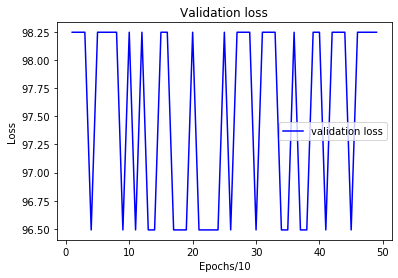

Best model with 10 classifiers and 98.24561403508771 % accuracy
Accuracy on test: 0.9649122807017544 %


In [33]:
from sklearn import model_selection 
from sklearn.ensemble import BaggingClassifier 
import sklearn
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

################################################################################
# TODO : initialize the base classifier. You can choose one of the classifiers #
# you have learned in this course.(SVM/Decision tree)                          #
# IMPORTANT: if you are using SVM as base classifier don't forget to add column#
# of '1' s for bias and be careful to use the right datset in next parts.      #
################################################################################
# X_val = np.insert(X_val, 0, 1, axis=1)
# X_train = np.insert(X_train, 0, 1, axis=1)
# X_test = np.insert(X_test, 0, 1, axis=1)
# print(X_train.shape)  
# print(X_val.shape)  
# print(X_test.shape) 
base_cls = tree.DecisionTreeClassifier()

##################################################################################
# TODO: Number of classifiers is a hyperparameter. Choose it by using validation #
# data to have the best accuracy                                                 #
# For different number of classifiers, train the model with training data and    #
# compute accuracy for validation data. Plot accuracy-number of classifiers plot.#
##################################################################################
loss_val_history = []
fscore = 0
best_acc = []
for i in range(1,50):
    num_cls = i*10
    seed = None
    model = BaggingClassifier(base_estimator = base_cls, 
                              n_estimators = num_cls, 
                              random_state = seed)
    model.fit(X_train,y_train)
    sc = model.score(X_val,y_val)*100
#     print(sc,accuracy_score(y_val,model.predict(X_val)))
    loss_val_history.append(sc)
    if sc > fscore:
        fscore = sc
        final_model = model
        best_acc = [i*10,sc]
    
epochs = range(1,50)
plt.plot(epochs, loss_val_history, 'b', label='validation loss')
plt.title('Validation loss')
plt.xlabel('Epochs/10')
plt.ylabel('Loss')
plt.legend()
plt.show()
################################################################################
# compute and report the accuracy for test data.                               #
################################################################################
print("Best model with",best_acc[0],"classifiers and",best_acc[1],"% accuracy")
print("Accuracy on test:",final_model.score(X_test,y_test),"%")


## Problem 2. Random Forest(25 points)</br>
In this part, you should write your own code to classify the data, using random forest from sklearn package in python.

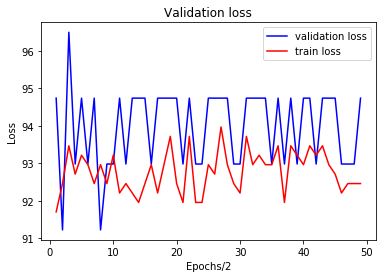

Best model with depth 1 and 3 classifiers and 96.49122807017544 % accuracy


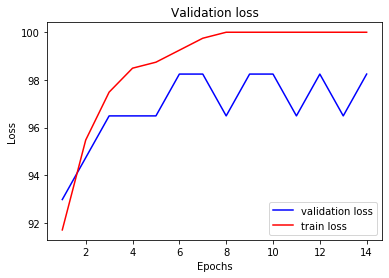

Best model with depth 6 and 3 classifiers and 98.24561403508771 % accuracy
train:
              precision    recall  f1-score   support

        -1.0       1.00      0.98      0.99       141
         1.0       0.99      1.00      0.99       257

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398

accuracy= 0.992462311557789
confusion matrix=
 [[138   3]
 [  0 257]]
test:
              precision    recall  f1-score   support

        -1.0       0.98      0.91      0.94        44
         1.0       0.95      0.99      0.97        70

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

accuracy= 0.956140350877193
confusion matrix=
 [[40  4]
 [ 1 69]]


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#################################################################################
# TODO:use the validation data to determine hyperparameters(number and depth of #
# trees) for the best accuracy                                                  # 
#################################################################################
loss_val_history = []
loss_history = []
fscore = 0
best_acc_num = []
for i in range(1,50):
    num_cls = i
    seed = None
    model = RandomForestClassifier(n_estimators=num_cls,max_depth=1)
    model.fit(X_train,y_train)
    sc = model.score(X_val,y_val)*100
    loss_val_history.append(sc)
    loss_history.append(model.score(X_train,y_train)*100)
    if sc > fscore:
        fscore = sc
        final_model = model
        best_acc_num = [i,sc]
epochs = range(1,50)
plt.plot(epochs, loss_val_history, 'b', label='validation loss')
plt.plot(epochs, loss_history, 'r', label='train loss')
plt.title('Validation loss')
plt.xlabel('Epochs/2')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Best model with depth 1 and",best_acc_num[0],"classifiers and",best_acc_num[1],"% accuracy")
loss_val_history = []
loss_history = []
fscore = 0
best_acc_d = []
for i in range(1,15):
    num_cls = i
    seed = None
    model = RandomForestClassifier(n_estimators=best_acc[0],max_depth=i)
    model.fit(X_train,y_train)
    sc = model.score(X_val,y_val)*100
    loss_val_history.append(sc)
    loss_history.append(model.score(X_train,y_train)*100)
    if sc > fscore:
        fscore = sc
        final_model = model
        best_acc_d = [i,sc]
epochs = range(1,15)
plt.plot(epochs, loss_val_history, 'b', label='validation loss')
plt.plot(epochs, loss_history, 'r', label='train loss')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Best model with depth",best_acc_d[0],"and",best_acc_num[0],"classifiers and",best_acc_d[1],"% accuracy")

#######################################################################################
#TODO:report accuracy, presition,recall and confusion matrix for train and test data  #
#######################################################################################
print("train:")
print(classification_report(y_train,final_model.predict(X_train)))
print("accuracy=",accuracy_score(y_train,final_model.predict(X_train)))
print("confusion matrix=\n",confusion_matrix(y_train,final_model.predict(X_train)))
print("test:")
print(classification_report(y_test,final_model.predict(X_test)))
print("accuracy=",accuracy_score(y_test,final_model.predict(X_test)))
print("confusion matrix=\n",confusion_matrix(y_test,final_model.predict(X_test)))


Question:
Explain how you did choose the hyperparameters.</br>

<div dir='rtl'>
ابتدا ارتفاع درخت را برابر ۱ در نظر می‌گیرم و تعداد درخت‌ها را از ۱ تا ۵۰ ، ۱۰ تا ۱۰ تا زیاد می کنم، سپس  از بین آن‌‌ها مدلی که به بیشترین اکیورسی رسیده 96.4٪ انتخاب می‌کنم، سپس با همین تعداد درخت  که این اکیورسی  را گرفتم، ارتفاع درخت را از ۱ تا ۵ تغییر می‌دهیم و آنجا که بالاترین دقت را گرفتیم 98.2٪ به عنوان  مدل نهایی تایین میکنیم.

## Problem 3. Boosting : AdaBoost (35 points)

In this part you should implement adaptive boosting algorithm. </br>
<picture>
  <img src="http://uupload.ir/files/b919_adaboost.png" alt="Adaboost" width="600" height="300">
</picture>



In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
X_train ,X_test ,y_train ,y_test = None ,None ,None ,None
###################################################################
# TODO: use 80% of normalized data as train and 20% as test data. #
###################################################################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# print(X)
# print(y)

######################################################################
#TODO : define a weak decision tree.                                 #
# initialize these parameters: criterion="entropy" and max_depth = 1 #
######################################################################
Tree_model = DecisionTreeClassifier(criterion="entropy",max_depth = 1)
#############################################################################################
#TODO : report accuracy of your weak model on train and test data by using cross validation #
#############################################################################################
c_v = cross_validate(Tree_model, X, y,cv=5)
test_accuracy = np.mean(c_v['test_score']) 
print('The testing data accuracy is:' ,test_accuracy * 100 , '%')


The testing data accuracy is: 90.52250865717583 %


In [35]:
import math
class AdaBoost:
    
    def __init__(self,train_data_X,train_data_y,tree_num,test_data_X,test_data_y):
        self.train_data_X = train_data_X
        self.train_data_y = train_data_y
        self.tree_num = tree_num
        self.test_data_X = test_data_X
        self.test_data_y = test_data_y
        self.alphas = None
        self.models = None
        self.accuracy = []
        self.test_accuracy = []
        self.predictions = None
        self.test_predictions = None
        
    def fit(self):
        Evaluation = pd.DataFrame(self.train_data_y.copy())
        Evaluation.columns = ['target']
        ## TODO:Set the initial weights w = 1/N
        Evaluation['weights'] = 1/len(self.train_data_y) 
#         print(Evaluation)
        alphas = [] #list of alphas 
        models = [] # list of trained models
        for t in range(self.tree_num):

            ## TODO: create a weak decisiontree classifier
            Tree_model = DecisionTreeClassifier(criterion="entropy",max_depth = 1)
            ## TODO: fit the model with train data. set the sample_weight parameter to the 'weights' columns in Evaluation dataframe
            model = Tree_model.fit(self.train_data_X,self.train_data_y,sample_weight = Evaluation['weights'].values) 
            models.append(model)
            predictions = model.predict(self.train_data_X)
            score = model.score(self.train_data_X,self.train_data_y)

            ## Add this columns to the Evaluation DataFrame
            Evaluation['predictions'] = predictions
#             print("2",Evaluation)
            ## TODO: In each row if the prediction and the target are equal,this column must be '1' and '0' O.W.
            Evaluation['evaluation'] = None
            for i in range(len(self.train_data_y)):
                if Evaluation['predictions'][i] == Evaluation['target'][i]:
                    Evaluation['evaluation'][i] = 1
                else:
                    Evaluation['evaluation'][i] = 0
            ## TODO: In each row if the tha data is missclassified, this column must be 1.
            Evaluation['misclassified'] = None
            for i in range(len(self.train_data_y)):
                if Evaluation['evaluation'][i] == 0:
                    Evaluation['misclassified'][i] = 1
                else:
                    Evaluation['misclassified'][i] = 0
#             print("3",Evaluation)

            ## TODO: Calculate the misclassification rate and accuracy and then use them to calculate error
            accuracy = sum(Evaluation['evaluation'].values)/len(self.train_data_y)
            misclassification = 1 - accuracy
            err = sum(Evaluation['weights'].values*Evaluation['misclassified'].values)
#             print(accuracy,misclassification,err)

            ## TODO: Calculate the alpha values from the adaboost algorithm
            alpha = 0.5*np.log((1-err)/err)
            alphas.append(alpha)
            ## TODO: update the weights
            for i in range(len(self.train_data_y)):
                Evaluation['weights'].values[i] = Evaluation['weights'].values[i]*math.exp(-1*alpha*Evaluation['target'].values[i]*Evaluation['predictions'].values[i])
            Evaluation['weights'] = Evaluation['weights']/sum(Evaluation['weights'].values)
#             print("4",Evaluation)

        self.alphas = alphas
        self.models = models
        
        
    def predict(self):
        
        accuracy = []
        predictions = []
        #####################################################################################
        #TODO:                                                                              #
        # 1- predict target for test data and append each prediction to the predictions list#
        # 2- Create a list of accuracies which can be used to plot the accuracy against the #
        # number of base learners used for the model                                        #
        #####################################################################################
        i = 0
        for alpha,model in zip(self.alphas,self.models):
            prediction = model.predict(self.train_data_X)
            predictions.append(self.alphas[i]*prediction)
            self.accuracy.append(accuracy_score(self.train_data_y,np.sign(np.sum(np.array(predictions),axis=0))))
            i += 1
        self.predictions = np.sign(np.sum(np.array(predictions),axis=0))        
    def predict_test(self):
        
        accuracy = []
        predictions = []
        i = 0
        for alpha,model in zip(self.alphas,self.models):
            prediction = model.predict(self.test_data_X)
            predictions.append(prediction)
            self.test_accuracy.append(accuracy_score(self.test_data_y,np.sign(np.sum(np.array(predictions),axis=0))))
            i += 1

            
        self.test_predictions = np.sign(np.sum(np.array(predictions),axis=0))


With a number of  100 base models we receive an accuracy of  100.0 %


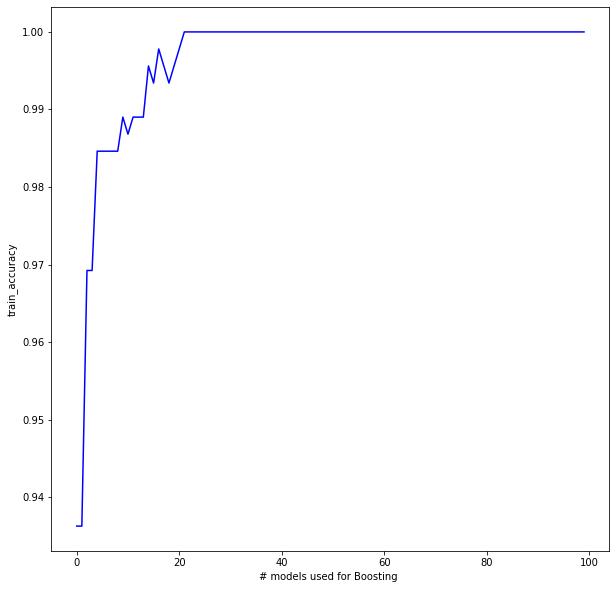

Test Accuracy:  100.0 %


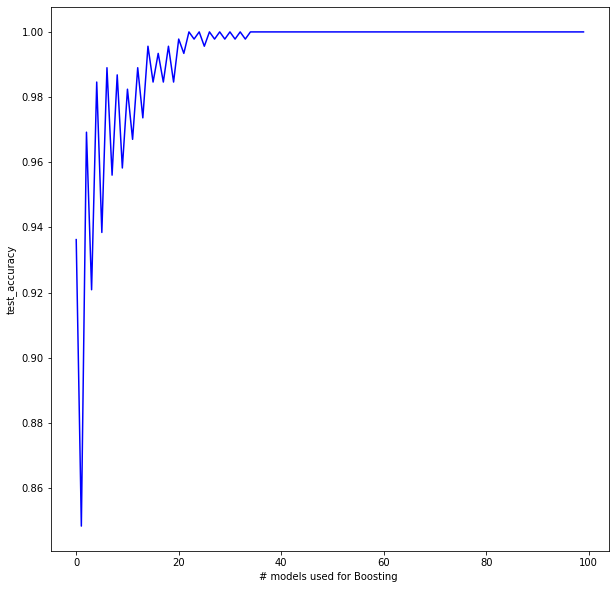

In [36]:
# Accuracy - number of base learners plot for training data
pd.options.mode.chained_assignment = None 
number_of_base_learners = 100

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)


# for i in range(number_of_base_learners):
model = AdaBoost(X_train,y_train,number_of_base_learners,X_train,y_train)
model.fit()
model.predict()

ax0.plot(range(len(model.accuracy)),model.accuracy,'-b')
ax0.set_xlabel('# models used for Boosting ')
ax0.set_ylabel('train_accuracy')
print('With a number of ',number_of_base_learners,'base models we receive an accuracy of ',model.accuracy[-1]*100,'%')    
                 
plt.show()   
#################################################################### 
# TODO: Plot Accuracy - number of base learners plot for test data #
####################################################################  

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)


# for i in range(number_of_base_learners):
model.predict_test()

ax0.plot(range(len(model.test_accuracy)),model.test_accuracy,'-b')
ax0.set_xlabel('# models used for Boosting ')
ax0.set_ylabel('test_accuracy')       
print('Test Accuracy: ',model.test_accuracy[-1]*100,'%')    
plt.show() 

# Feature Selction </br>

## problem4. Filtering : correlation coefficient (25 points)


In [9]:
################################################################################# 
# TODO:                                                                         #
# use 80% of normalized data as train and 20% as test data.(just use the data   # 
# from last part)                                                               #
# 1- compute the correlation coefficient between each feature and target.       #
# 2- Report the features that their correlation is more than 0.5                #
# 3- compute the correlation between the features you reported in 2nd           #
# section and report features that their correlation with other features        #
# is less than 0.5                                                              #
# 4- use perceptron from sklearn package to classify the data. Report accurracy #
# for test data and sort the features based on their weights in perceptron.     #
# IMPORTANT: Don't forget to add 1s to the end of feature vectors to be         #
# multiplied by bias term of weight in perceptron.                              #
# 5- compare the features you reported in section 2 and 3 with the features     #
# that have the most weights in perceptron and write your analysis below        #
# 6 - Classify data with perceptron and use only the features you repoted in    # 
# section 2 and report accuracy for test data.                                  #
# 7 - Do the same with section 3 and compare accuracies.                        #
#################################################################################

In [37]:
all = np.append(np.transpose(X_train),[y_train],axis=0)
mat = np.corrcoef(all)
num_array = []
num = 0
p2 = []
for i in range(len(mat)):
    if i != 30:
        if abs(mat[30][i])>0.5:
            p2.append(i)
print(p2)
p3 = []
for i in p2:
    num = 0
    for j in p2:
        if j != i:
#             print(mat[i][j])
            if abs(mat[i][j])<0.5:
                num+=1
    num_array.append([i,num])
num_array.sort(key=lambda x: -x[1])
for i in range(3):
    p3.append(num_array[i][0])

print(p3)           

[0, 2, 3, 5, 6, 7, 10, 12, 13, 20, 22, 23, 25, 26, 27]
[25, 13, 26]


In [38]:
# X_train1 = np.insert(X_train, 30, 1, axis=1)
# X_test1 = np.insert(X_test, 30, 1, axis=1)
X_train1 = X_train
X_test1 = X_test
print(X_train1.shape)  
print(X_test1.shape) 

(455, 30)
(114, 30)


In [39]:
from sklearn.linear_model import Perceptron
clf = Perceptron()
clf.fit(X_train1,y_train)
print(clf.score(X_test1,y_test))
print(clf.coef_)
w = []
for i in range(len(clf.coef_[0])):
    w.append([i,abs(clf.coef_[0][i])])
w.sort(key=lambda x: -x[1])
w

0.9298245614035088
[[-8.61895972e-01 -4.25634089e+00 -8.69393960e-01 -2.05730647e+00
  -4.25205381e-01  1.81936691e+00 -3.53214620e+00 -4.12316103e+00
   1.23737374e-01  4.79970514e+00 -5.50726055e+00  1.66044908e+00
  -4.34359421e+00 -3.26270550e+00 -3.28476731e+00  1.93344249e+00
   3.84848485e-03 -1.41587422e+00  7.99375246e-01  1.71270539e+00
  -3.43315546e+00 -3.73081023e+00 -3.06663678e+00 -3.30414373e+00
  -4.33487420e+00 -9.15572761e-01 -3.52429712e+00 -3.53068729e+00
  -5.07983442e+00 -9.00564082e-02]]


[[10, 5.507260546804271],
 [28, 5.07983441750444],
 [9, 4.799705139005899],
 [12, 4.343594213824626],
 [24, 4.33487419930001],
 [1, 4.256340886033144],
 [7, 4.12316103379722],
 [21, 3.730810234541582],
 [6, 3.5321462043111485],
 [27, 3.5306872852233617],
 [26, 3.5242971246006434],
 [20, 3.4331554606901444],
 [23, 3.304143727880451],
 [14, 3.2847673114185683],
 [13, 3.2627055013279835],
 [22, 3.0666367847004357],
 [3, 2.0573064687168587],
 [15, 1.9334424850542251],
 [5, 1.8193669100055212],
 [19, 1.7127053881127106],
 [11, 1.6604490806223484],
 [17, 1.4158742186020081],
 [25, 0.9155727605242988],
 [2, 0.8693939603344663],
 [0, 0.8618959723602619],
 [18, 0.7993752462430357],
 [4, 0.4252053805181909],
 [8, 0.12373737373737576],
 [29, 0.0900564082382269],
 [16, 0.0038484848484841815]]

In [40]:
new_X_train = np.insert(np.transpose(np.transpose(X_train)[p2]), len(p2), 1, axis=1)
new_X_test = np.insert(np.transpose(np.transpose(X_test)[p2]), len(p2), 1, axis=1)
clf = Perceptron()
clf.fit(new_X_train,y_train)
print(clf.score(new_X_test,y_test))
new_X_train = np.insert(np.transpose(np.transpose(X_train)[p3]), len(p3), 1, axis=1)
new_X_test = np.insert(np.transpose(np.transpose(X_test)[p3]), len(p3), 1, axis=1)
clf = Perceptron()
clf.fit(new_X_train,y_train)
print(clf.score(new_X_test,y_test))

0.8771929824561403
0.8245614035087719


explanation of part 5 and 6:

<div dir='rtl'>
همانطور که در  سوال ۵ نظری هم گفته شد، در روش‌ هایی مثل perceptron، bias inductive وجود دارد که بادگیری بر  اساس  آن انجام می‌گیرد. این باعث می‌شود  به یک سری ویژگی‌‌های خاص توجه کند  ولی در feature selection ما  یک سری ویژگی کلی توجه می‌کنیم برای همین  ویژگی‌هایی که مورد توجه  قرار  می‌گیرد در ۲ روش متفاوت است.

Question: Is it important to extract features before classifying using methods like decision tree and SVM? why? 

<div dir='rtl'>
بله مهم  است، چون  این کار مانع overfitting می‌شود و باعث می‌شود گاها به دقت  بالاتری روی تست برسیم. چون در این روش به ویژگی‌های کلی‌تر توجه  می‌کند و انتخاب ‌می‌کند.

## problem 5. mRMR (10 bonus points) </br>
In this part you should write your own code and classify the data using mRMR method.You can use "pymrmr" package for this part.